<a href="https://colab.research.google.com/github/alexemanuel/ALU-C-Implementation/blob/main/Projeto_de_Rodrigo_(Minera%C3%A7%C3%A3o_de_Dados)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q pycaret

     |████████████████████████████████| 301 kB 7.4 MB/s 
     |████████████████████████████████| 1.3 MB 64.4 MB/s 
     |████████████████████████████████| 2.0 MB 52.0 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 114 kB 69.8 MB/s 
     |████████████████████████████████| 1.7 MB 58.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 38.0 MB/s 
     |████████████████████████████████| 6.8 MB 48.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 261 kB 60.8 MB/s 
     |████████████████████████████████| 167 kB 61.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 10.9 MB 37.9 MB/s 
     |████████████████████████████████| 636 kB 43.0 MB/s 
     |██████████████████

#__Data Exploration__

###__Visualize the Dataset__

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Projeto de Rodrigo (Mineração de Dados) 2/CrabAgePrediction.csv')
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6


In [5]:
df.shape

(3893, 9)

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [8]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662132,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491247,29.000000


###__Missing Values__

In [9]:
import missingno as msno

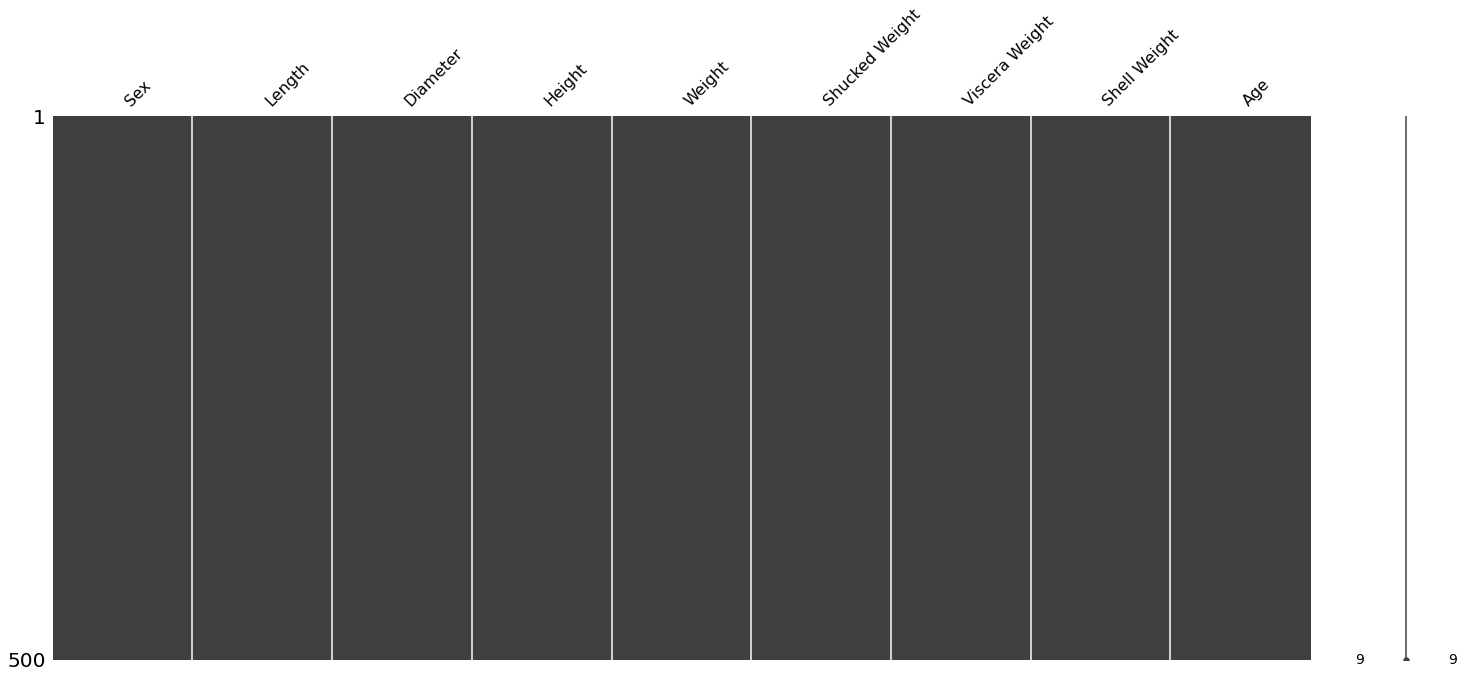

In [10]:
ax = msno.matrix(df.sample(500))

###__Data Distribution__

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

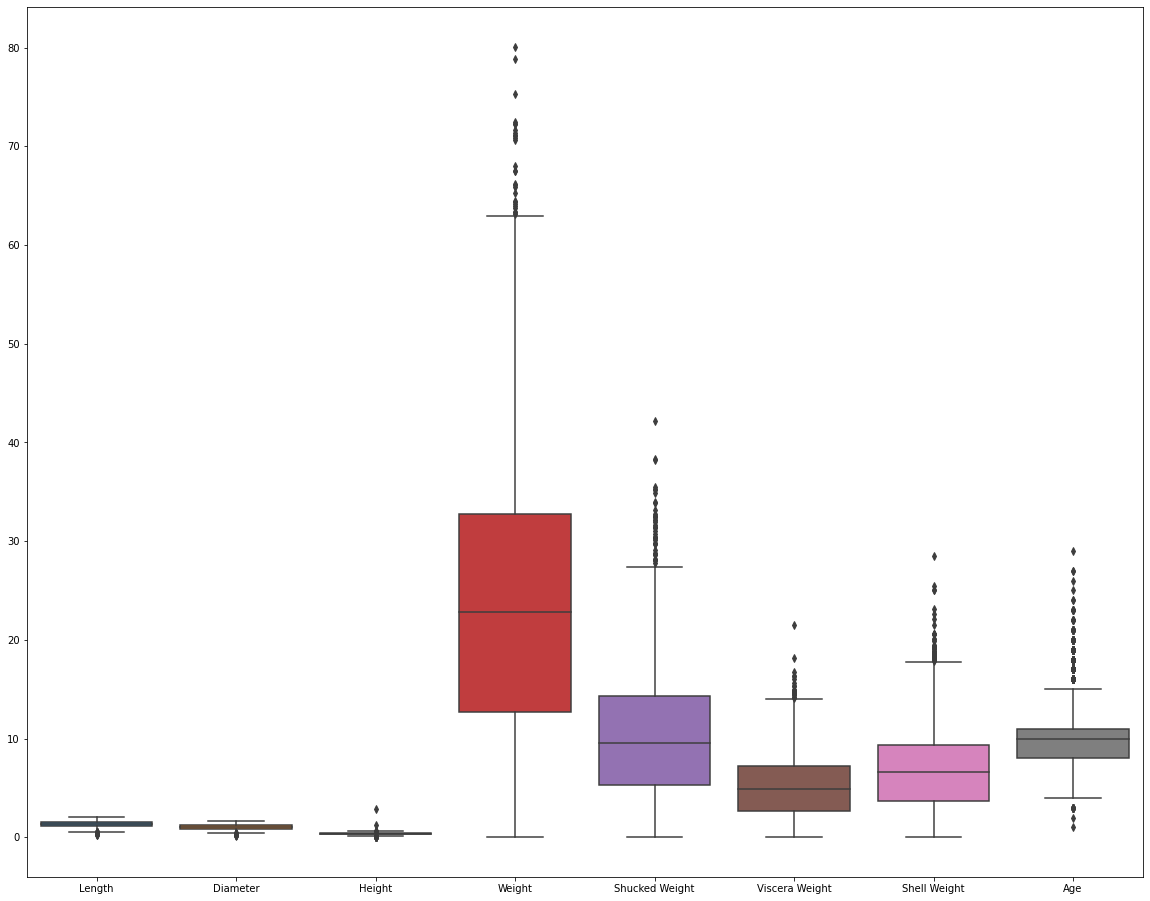

In [12]:
fig, ax = plt.subplots(figsize = (20,16))
sns.boxplot(data=df)

#__Preprocessing__

###__Encode Sex column__

In [13]:
df.Sex.unique()

array(['F', 'M', 'I'], dtype=object)

In [14]:
ordered_label = df.Sex.unique()
ordinal_label = {k:i for i, k in enumerate(ordered_label)}
print(ordinal_label)

df.Sex = df.Sex.map(ordinal_label)

{'F': 0, 'M': 1, 'I': 2}


###__Limit Outlier Values__

In [15]:
def clip_outliers(array):
  q1 = np.percentile(array,25)
  q2 = np.percentile(array,75)

  limit = 1.5 * (q1 - q2)
  upper_limit = q1 - limit
  lower_limit = q2 + limit

  clipped_data = np.clip(array, lower_limit,upper_limit)
  return clipped_data

In [16]:
for column in df:
  df[column] = clip_outliers(df[column])

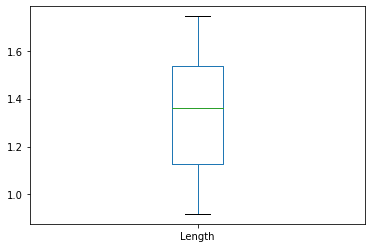

In [17]:
df.Length.plot.box()

###__Remove Duplicated Values__

In [18]:
# Number of duplicated values
df.duplicated().sum()

165

In [19]:
df = df.drop_duplicates()

#__Train and Evaluation__

In [20]:
from pycaret.regression import setup
from pycaret.regression import compare_models

In [21]:
setup(data=df, target='Age', silent=True, verbose=False, imputation_type='iterative')
best_models = compare_models(n_select=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.0336,1.6952,1.3005,0.5688,0.1225,0.1098,0.286
lightgbm,Light Gradient Boosting Machine,1.0433,1.7805,1.3323,0.5470,0.1255,0.1107,0.116
rf,Random Forest Regressor,1.0527,1.7919,1.3370,0.5440,0.1261,0.1118,1.027
lr,Linear Regression,1.0933,1.8425,1.3564,0.5313,0.1286,0.1170,0.287
lar,Least Angle Regression,1.0933,1.8425,1.3564,0.5313,0.1286,0.1170,0.014
br,Bayesian Ridge,1.0939,1.8439,1.3570,0.5310,0.1287,0.1171,0.013
et,Extra Trees Regressor,1.0667,1.8431,1.3559,0.5309,0.1279,0.1133,0.699
ridge,Ridge Regression,1.0943,1.8449,1.3573,0.5307,0.1287,0.1171,0.012
huber,Huber Regressor,1.0765,1.8703,1.3667,0.5241,0.1283,0.1130,0.063
knn,K Neighbors Regressor,1.0687,1.9095,1.3801,0.5132,0.1301,0.1132,0.063


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
X_data = df.iloc[:, :-1].to_numpy()
Y_data = df.iloc[:, -1].to_numpy()

In [24]:
execution_number = 10

In [29]:
def train_and_evaluate(model_class, tunning=None, pram_grid=None):    
    metrics = {
        'MSE': [],
        'R2': []
    }

    for step in range(execution_number):
        x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data)
        model = model_class()

        if tunning:
            model = GridSearchCV(estimator=model,
                                 param_grid=param_grid, 
                                 cv=10,
                                 n_jobs=30,
                                 scoring=['neg_mean_squared_error', 'r2'],
                                 refit="r2",
                                 verbose=True)
   
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mae = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        metrics['MSE'].append(mae)
        metrics['R2'].append(r2)
    
    print(model_class.__name__)
    print(f'MSE: {np.mean(metrics["MSE"])}')
    print(f'R2: {np.mean(metrics["R2"])}')
    print('------------------------------')

###__Running Without Tunning__

In [30]:
for model in best_models:
    train_and_evaluate(model.__class__)

GradientBoostingRegressor
MSE: 1.6738945032261519
R2: 0.5788595074613541
------------------------------
LGBMRegressor
MSE: 1.7643470834054291
R2: 0.5521385168230933
------------------------------


###__Running With Tunning__

In [31]:
param_grid = {
    'loss': ['squared_error', 'huber', 'ls'],
    'learning_rate': [0.001, 0.01, 0.1],
    #'n_estimators': [50, 100, 150],
    #'criterion': ['friedman_mse', 'mse'],
    'max_depth': [3, 6, 9],
    #'alpha': [0.5, 0.7, 0.9]
}

In [32]:
for model in best_models:
    train_and_evaluate(model.__class__, True, param_grid)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.4min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 197 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   46.9s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.1min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 197 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   47.4s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.1min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   47.7s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.2min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 198 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   47.0s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.2min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   46.3s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.2min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.9min remaining:   48.0s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.2min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 195 tasks      | elapsed:  2.1min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   46.4s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.1min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 195 tasks      | elapsed:  2.1min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   46.9s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.1min finished


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 195 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:  2.8min remaining:   47.2s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:  4.2min finished


GradientBoostingRegressor
MSE: 1.6938837903900683
R2: 0.5690475792594618
------------------------------
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:   22.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   29.6s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    9.6s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   16.0s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 190 tasks      | elapsed:   12.7s
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:   13.5s remaining:    3.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.8s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 191 tasks      | elapsed:   12.8s
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:   13.6s remaining:    3.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.9s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 192 tasks      | elapsed:   12.7s
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:   13.3s remaining:    3.7s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.8s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 191 tasks      | elapsed:   12.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.9s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    9.6s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   16.0s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 191 tasks      | elapsed:   12.9s
[Parallel(n_jobs=30)]: Done 211 out of 270 | elapsed:   13.6s remaining:    3.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.9s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 190 tasks      | elapsed:   12.8s
[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   15.8s finished
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    9.7s


LGBMRegressor
MSE: 1.6844201529227192
R2: 0.5745751973458277
------------------------------


[Parallel(n_jobs=30)]: Done 270 out of 270 | elapsed:   16.1s finished
